In [1]:
# %%  
# 1) Deskriptive Statistik über alle Dokumente (sem_cos)
import pandas as pd

# CSV einlesen
df_sem = pd.read_csv("sem_cos_results.csv")

# Kennzahlen berechnen
overall = df_sem["sem_cos_denis"].agg(["mean", "median", "std", "min", "max"])
print("=== Overall sem_cos ===")
print(overall, "\n")

# Optional: CSV mit den Overall-Stats speichern
overall.to_frame(name="value").to_csv("sem_cos_overall_stats.csv")


# %%  
# 2) Gruppiert nach Technologie & Modell
import pandas as pd

df_sem = pd.read_csv("sem_cos_results.csv")

# Gruppieren und Kennzahlen berechnen
grouped = df_sem.groupby(["technology", "model"])["sem_cos_denis"]
stats = grouped.agg(["mean", "median", "std", "min", "max"]).reset_index()

print("=== sem_cos by Technology & Model ===")
print(stats)

# Als CSV speichern
stats.to_csv("sem_cos_stats_by_model.csv", index=False)


=== Overall sem_cos ===
mean      0.958542
median    0.974911
std       0.041282
min       0.646001
max       0.998488
Name: sem_cos_denis, dtype: float64 

=== sem_cos by Technology & Model ===
   technology                 model      mean    median       std       min  \
0      recapp       gsw-CH_smoothed  0.982477  0.986725  0.014982  0.889692   
1        vosk    vosk-model-de-0.21  0.945747  0.959716  0.043941  0.696642   
2     whisper                 large  0.977106  0.982577  0.018585  0.820271   
3     whisper                medium  0.975157  0.981542  0.021302  0.827794   
4     whisper                 turbo  0.968662  0.978965  0.029973  0.774932   
5  whisper_v2  whisper_rescuespeech  0.902102  0.912493  0.041583  0.646001   

        max  
0  0.998217  
1  0.993570  
2  0.997724  
3  0.997928  
4  0.998488  
5  0.958781  


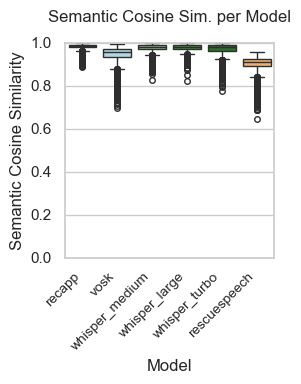

Plot saved at: results_for_paper/semantic_cosine_boxplot.png


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Daten laden
csv_path = "sem_cos_results.csv"
df = pd.read_csv(csv_path)
df["system"] = df["technology"] + "–" + df["model"]

# 2) Kürzere Labels mappen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben übernehmen
order = [lbl for lbl in ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
         if lbl in df["label"].unique()]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# 4) Plot-Settings
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(3, 4))

# 5) Boxplot zeichnen mit schwarzen Ausreißermarkern
flierprops = dict(marker='o', color='black', markersize=4)
ax = sns.boxplot(
    data=df,
    x="label",
    y="sem_cos_denis",
    order=order,
    palette=palette,
    flierprops=flierprops
)

# 6) Titel und Achsenbeschriftungen
ax.set_title("Semantic Cosine Sim. per Model", pad=15)
ax.set_xlabel("Model")
ax.set_ylabel("Semantic Cosine Similarity")

# 7) Y‑Achse auf [0,1] fixieren
ax.set_ylim(0, 1)

# 8) X‑Ticks drehen
plt.xticks(rotation=45, ha="right", fontsize=10)

# 9) Ordner für Ergebnisse erstellen
output_dir = os.path.join(os.path.dirname(csv_path), "results_for_paper")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 10) Plot speichern
output_png = os.path.join(output_dir, "semantic_cosine_boxplot.png")
plt.tight_layout()
plt.savefig(output_png, format="png", dpi=300)

# 11) Plot anzeigen und Pfad ausgeben
plt.show()
print(f"Plot saved at: {output_png}")


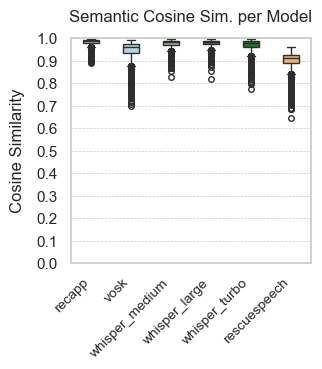

Plot saved at: results_for_paper/semantic_cosine_boxplot_fixed.png


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Daten laden
csv_path = "sem_cos_results.csv"
df = pd.read_csv(csv_path)
df["system"] = df["technology"] + "–" + df["model"]

# 2) Kürzere Labels mappen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben übernehmen
order = [lbl for lbl in ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
         if lbl in df["label"].unique()]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# 4) Plot‑Style
sns.set(style="whitegrid", font_scale=1.0)

# 5) Figure & Axes absolut setzen (Template)
fig = plt.figure(figsize=(3, 3))
ax = fig.add_axes([0.12, 0.18, 0.80, 0.75])

# 6) Boxplot zeichnen
flierprops = dict(marker='o', color='black', markersize=4)
sns.boxplot(
    data=df,
    x="label",
    y="sem_cos_denis",
    order=order,
    palette=palette,
    flierprops=flierprops,
    ax=ax,
    width=0.4
)

# 7) Titel, Achsenbeschriftungen & fixe Y‑Skala
ax.set_title("Semantic Cosine Sim. per Model", pad=12)
ax.set_xlabel("")
ax.set_ylabel("Cosine Similarity", labelpad=8)
ax.set_ylim(0, 1)

# 8) Einheitliche Grid‑Linien bei 0.1‑Schritten
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.grid(axis="y", which="major", linestyle="--", linewidth=0.5)

# 9) X‑Ticks rotieren
ax.set_xticklabels(order, rotation=45, ha="right", fontsize=10)

# 10) Subplots Adjust für korrekte Ränder
fig.subplots_adjust(top=0.90, left=0.12, right=0.92, bottom=0.15)

# 11) Ergebnis‑Ordner & Speichern
output_dir = os.path.join(os.path.dirname(csv_path), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)
output_png = os.path.join(output_dir, "semantic_cosine_boxplot_fixed.png")
fig.savefig(output_png, format="png", dpi=300, bbox_inches='tight', pad_inches=0.1)

# 12) Anzeige & Pfad
plt.show()
print(f"Plot saved at: {output_png}")


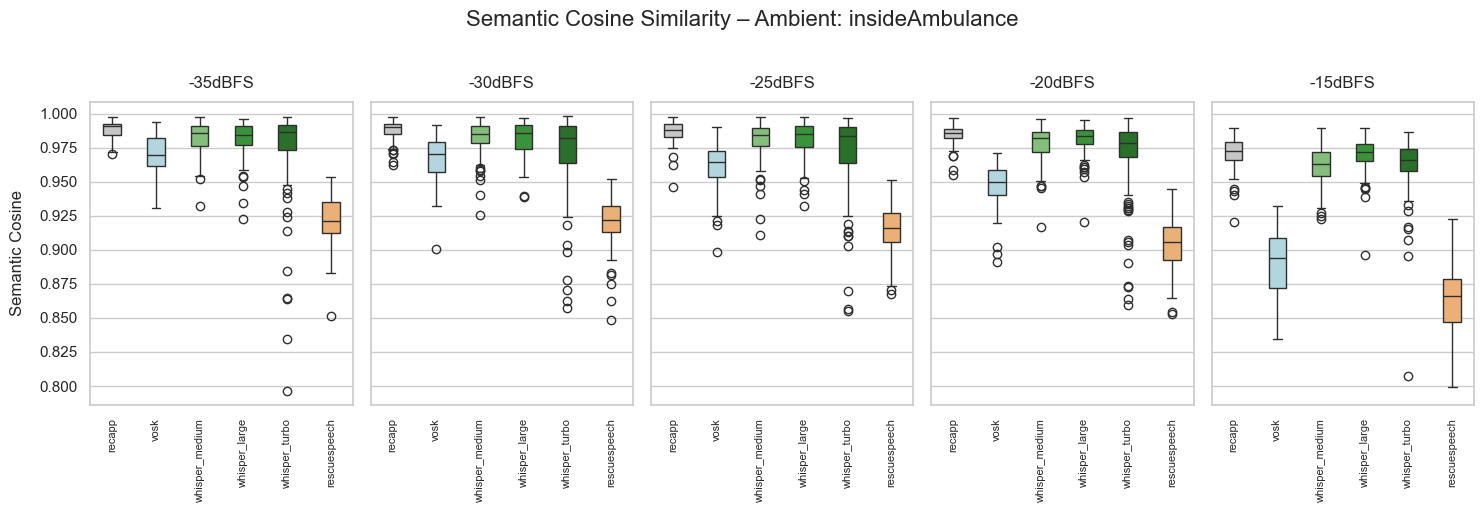

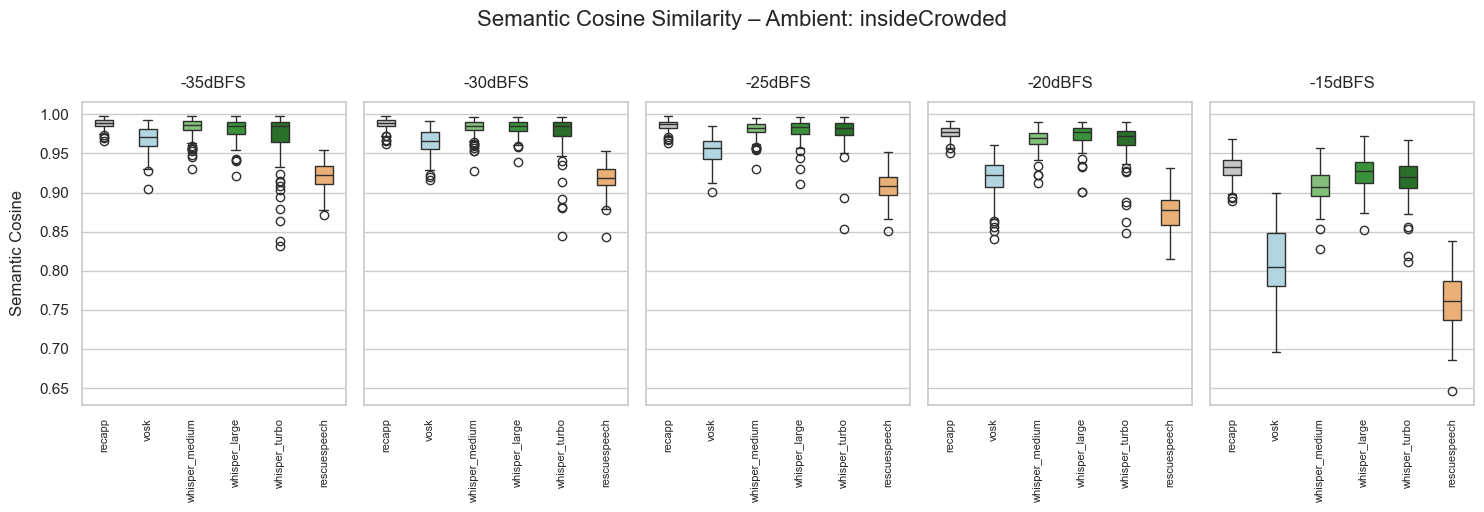

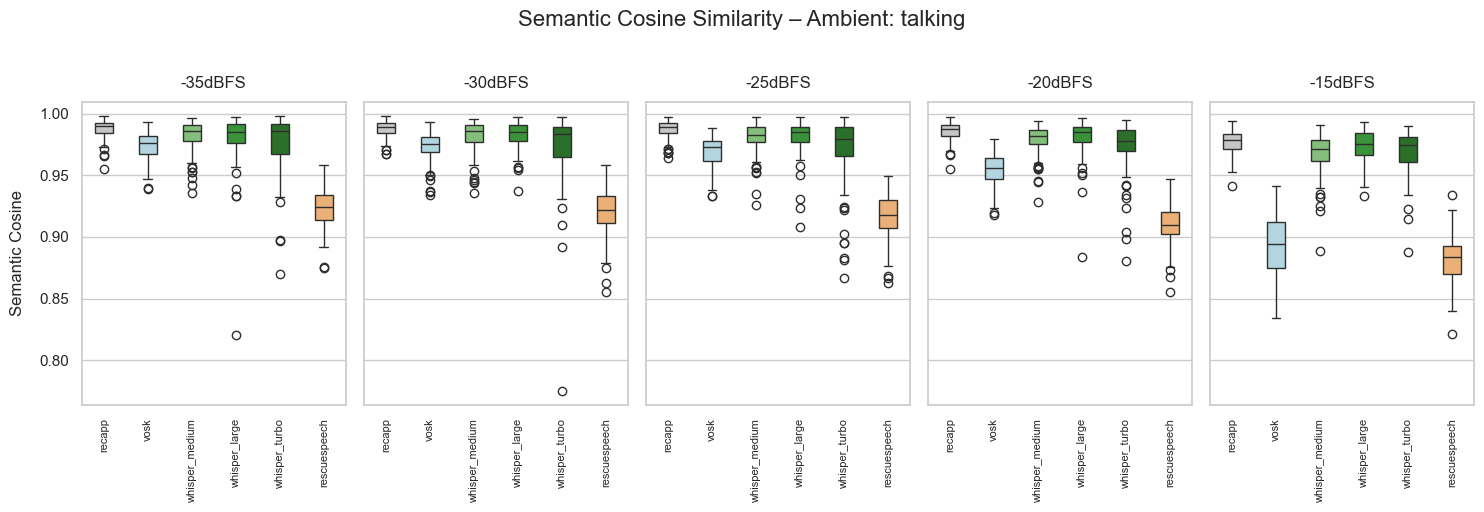

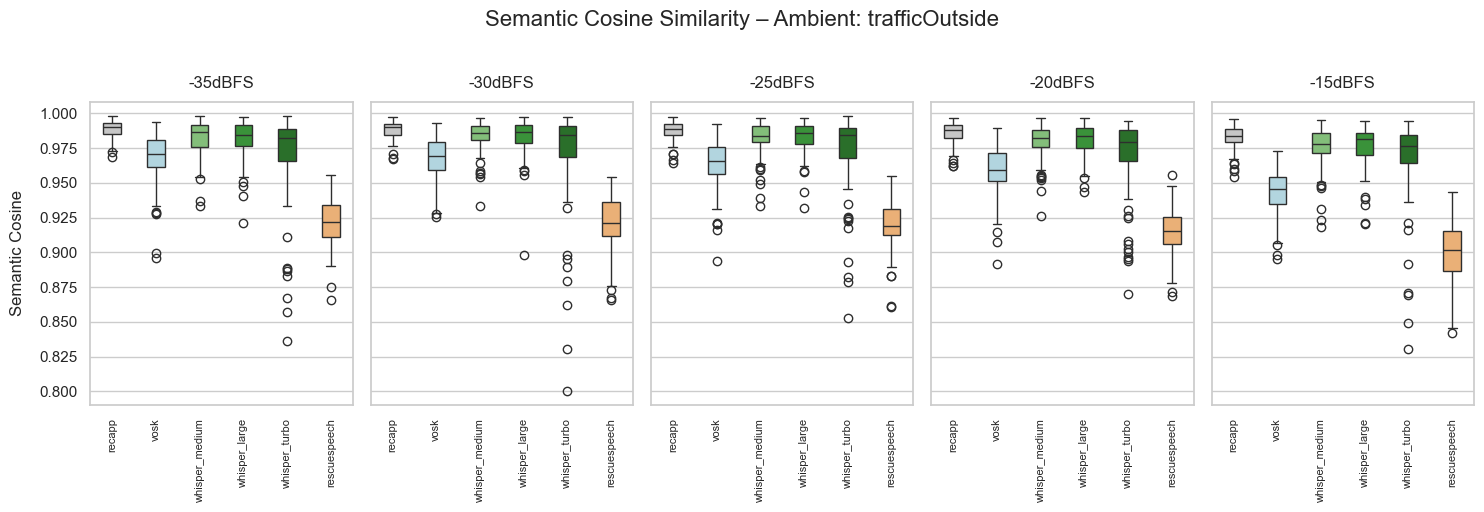

In [3]:
# %%  
# 4) Boxplots: sem_cos_denis pro System & Volumen, pro Ambient
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Daten laden
df = pd.read_csv("sem_cos_results.csv")
df["system"] = df["technology"] + "–" + df["model"]

# 2) Label-Map & Reihenfolge übernehmen (wie bei BLEU)
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

order = ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# 3) Volume-Kategorien
volumes = ["-35dBFS","-30dBFS","-25dBFS","-20dBFS","-15dBFS"]

sns.set(style="whitegrid", font_scale=1.0)

# 4) Für jede Ambient-Variante eigene Plot-Reihe
for amb in sorted(df["ambientVariant"].unique()):
    subset_amb = df[df["ambientVariant"] == amb]
    if subset_amb.empty:
        continue

    fig, axes = plt.subplots(1, len(volumes), 
                             figsize=(len(volumes)*3, 5), 
                             sharey=True)
    fig.suptitle(f"Semantic Cosine Similarity – Ambient: {amb}", 
                 fontsize=16, y=1.02)

    for idx, vol in enumerate(volumes):
        ax = axes[idx]
        sub = subset_amb[subset_amb["processedVolume"] == vol]
        sns.boxplot(
            data=sub,
            x="label", y="sem_cos_denis",
            order=order, palette=palette,
            ax=ax,
            width=0.4
        )
        ax.set_title(vol, pad=10)
        ax.set_xlabel("")
        if idx == 0:
            ax.set_ylabel("Semantic Cosine", labelpad=10)
        else:
            ax.set_ylabel("")
        ax.set_xticklabels(order, rotation=90, ha="center", fontsize=8)

    plt.tight_layout()
    plt.show()


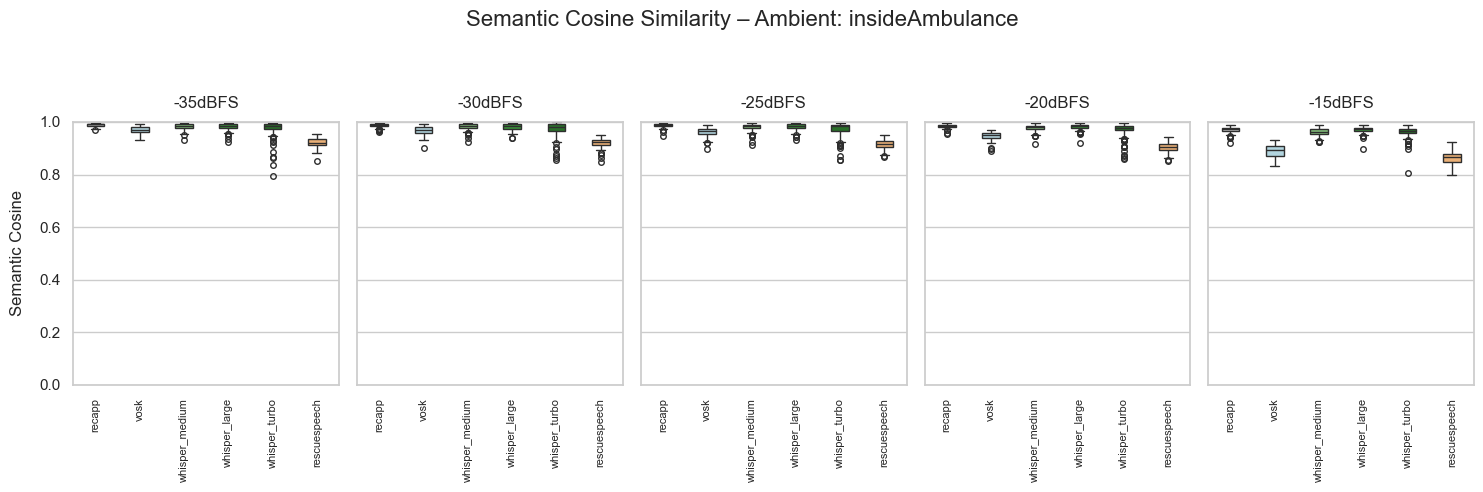

Plot saved at: results_for_paper/semantic_cosine_boxplot_insideAmbulance.png


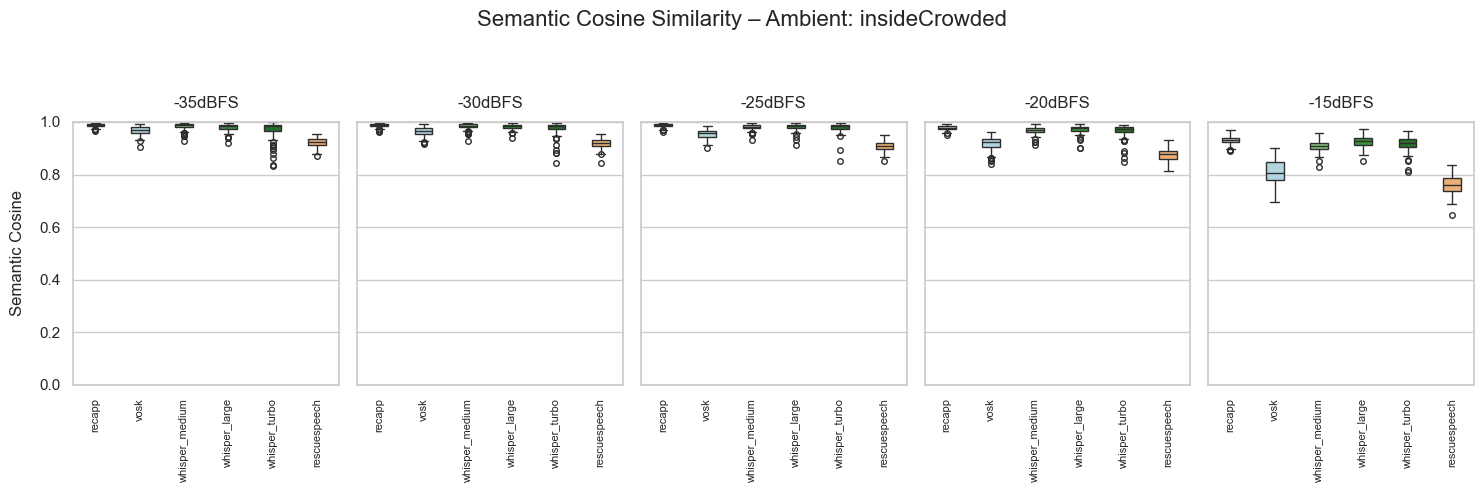

Plot saved at: results_for_paper/semantic_cosine_boxplot_insideCrowded.png


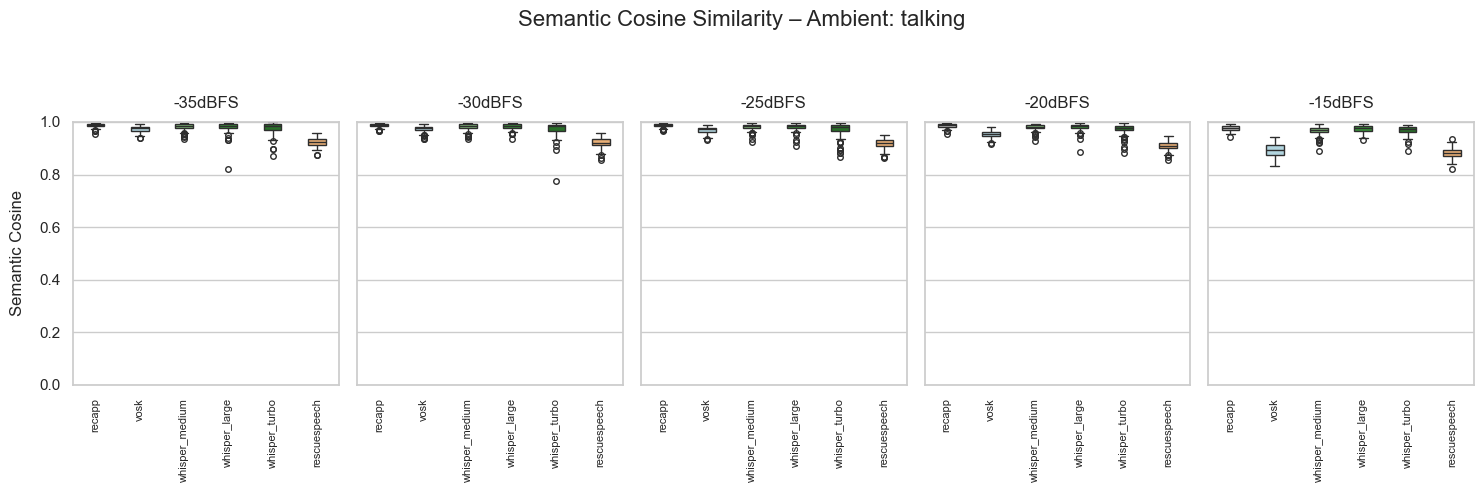

Plot saved at: results_for_paper/semantic_cosine_boxplot_talking.png


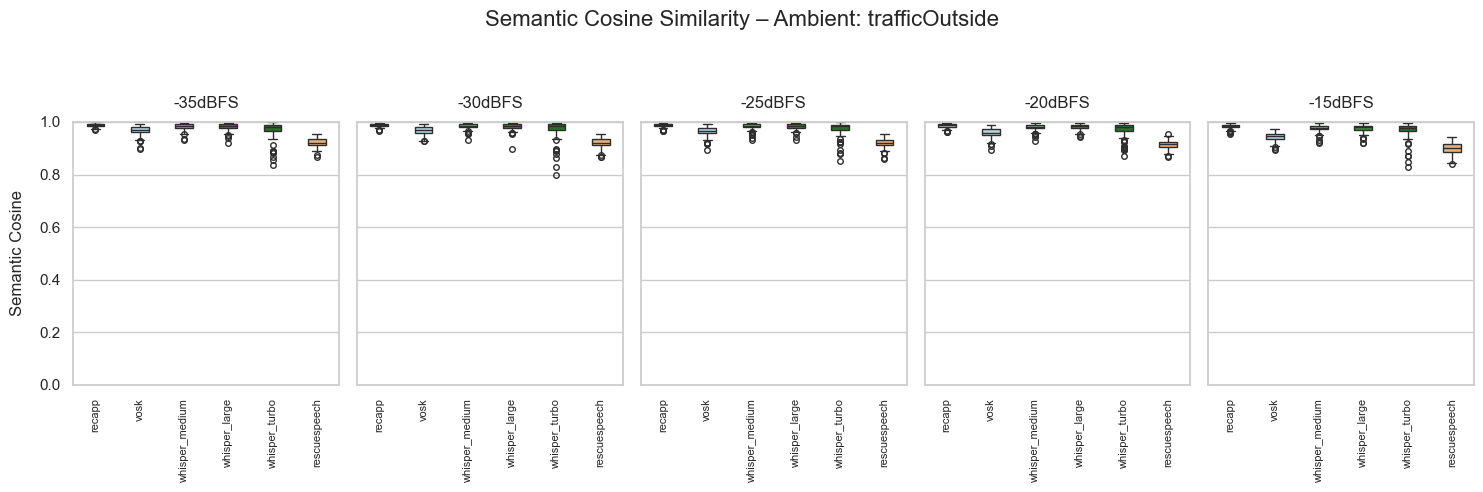

Plot saved at: results_for_paper/semantic_cosine_boxplot_trafficOutside.png


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Daten laden
csv_path = "sem_cos_results.csv"
df = pd.read_csv(csv_path)
df["system"] = df["technology"] + "–" + df["model"]

# 2) Label-Map & Reihenfolge übernehmen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

order = ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# 3) Volumen-Kategorien
volumes = ["-35dBFS","-30dBFS","-25dBFS","-20dBFS","-15dBFS"]

sns.set(style="whitegrid", font_scale=1.0)

# Ordner für Ergebnisse erstellen, falls nicht existiert
output_dir = os.path.join(os.path.dirname(csv_path), "results_for_paper")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 4) Boxplots für jede Ambient-Variante
for amb in sorted(df["ambientVariant"].unique()):
    subset_amb = df[df["ambientVariant"] == amb]
    if subset_amb.empty:
        continue

    fig, axes = plt.subplots(1, len(volumes), figsize=(len(volumes)*3, 5), sharey=True)

    for idx, vol in enumerate(volumes):
        ax = axes[idx]
        sub = subset_amb[subset_amb["processedVolume"] == vol]

        sns.boxplot(
            data=sub,
            x="label", y="sem_cos_denis",
            order=order, palette=palette,
            ax=ax, width=0.4,
            flierprops=dict(marker='o', color='black', markersize=4)
        )

        ax.set_title(vol, pad=10)
        ax.set_xlabel("")
        if idx == 0:
            ax.set_ylabel("Semantic Cosine", labelpad=10)
        else:
            ax.set_ylabel("")

        ax.set_xticklabels(order, rotation=90, ha="center", fontsize=8)
        ax.set_ylim(0, 1)  # feste Skalierung von 0 bis 1

    # Supertitel setzen
    fig.suptitle(f"Semantic Cosine Similarity – Ambient: {amb}", fontsize=16)

    # Layout so anpassen, dass der Titel nicht abgeschnitten wird
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    # Plot als PNG speichern
    output_png = os.path.join(output_dir, f"semantic_cosine_boxplot_{amb}.png")
    fig.savefig(output_png, format="png", dpi=300)

    # Anzeigen und Pfad ausgeben
    plt.show()
    print(f"Plot saved at: {output_png}")


# Inference

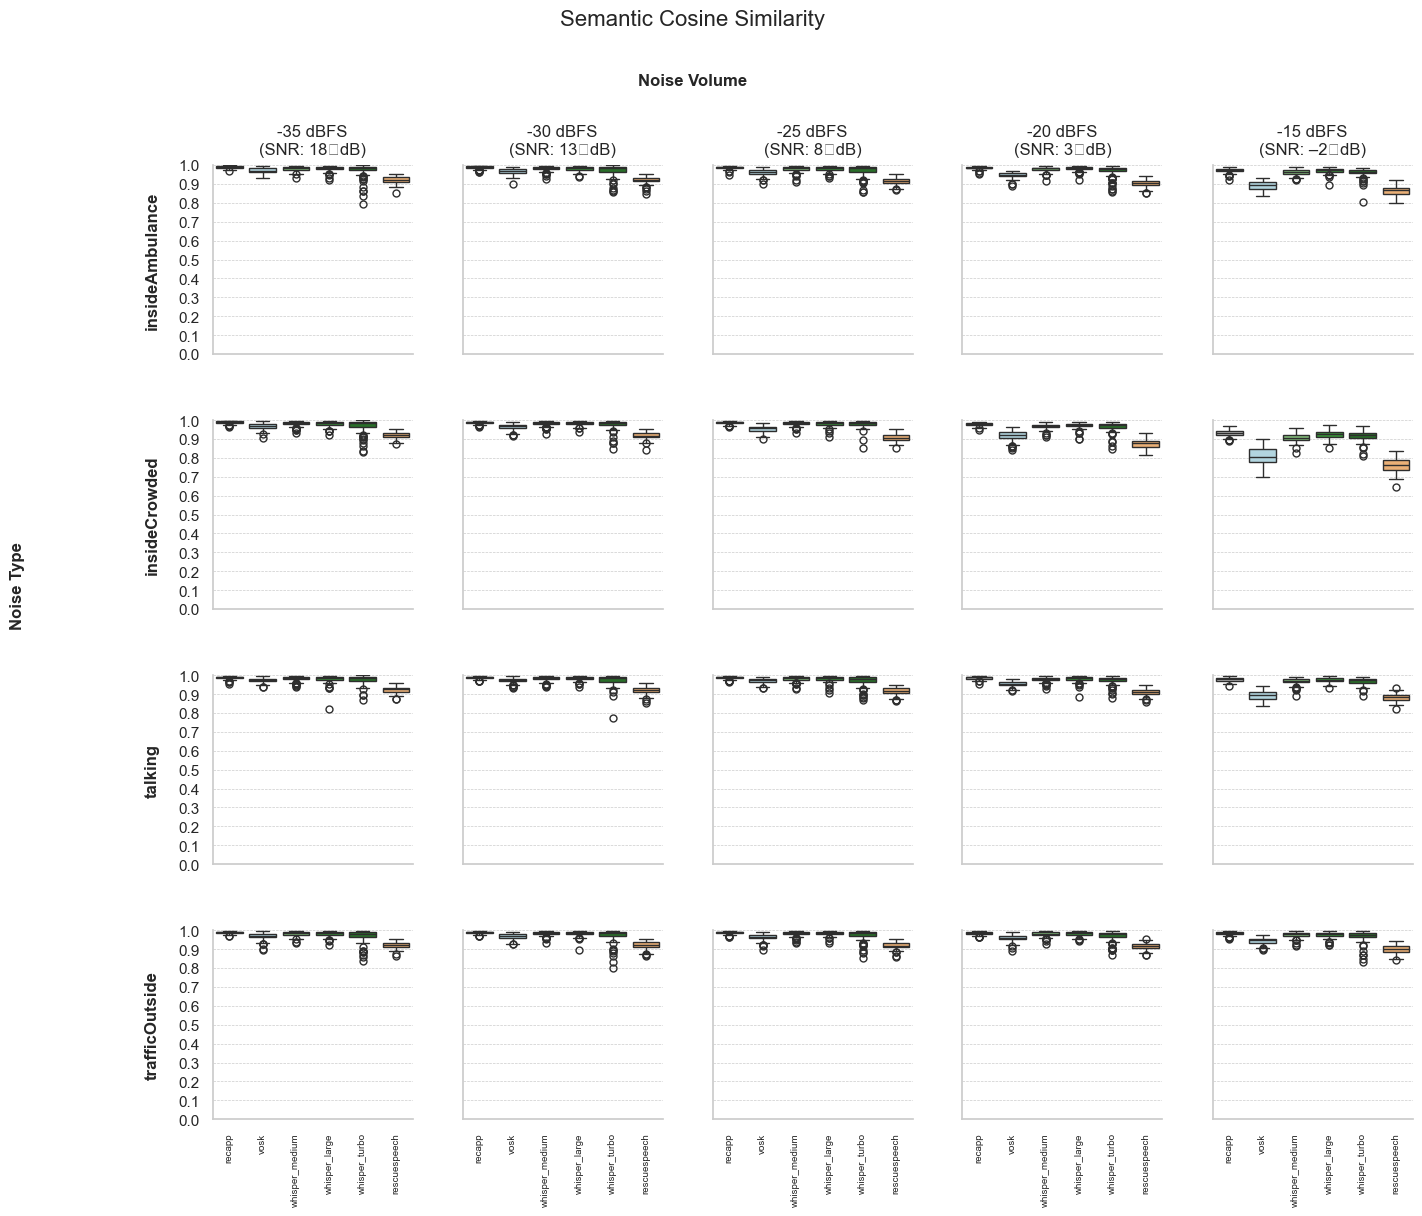

Plot saved at: results_for_paper/semantic_cosine_facetgrid.png


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
from matplotlib.ticker import MultipleLocator

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# 1) Daten laden
csv_path = "sem_cos_results.csv"
df = pd.read_csv(csv_path)
df["system"] = df["technology"] + "–" + df["model"]

# 2) Labels mappen
label_map = {
    "recapp–gsw-CH_smoothed":         "recapp",
    "vosk–vosk-model-de-0.21":         "vosk",
    "whisper–medium":                  "whisper_medium",
    "whisper–large":                   "whisper_large",
    "whisper–turbo":                   "whisper_turbo",
    "whisper_v2–whisper_rescuespeech": "rescuespeech"
}
df["label"] = df["system"].map(label_map)

# 3) Reihenfolge & Farben übernehmen
order = ["recapp","vosk","whisper_medium","whisper_large","whisper_turbo","rescuespeech"]
palette = {
    "recapp":         "#c6c6c6",
    "vosk":           "#aad9e6",
    "whisper_medium": "#7bc96f",
    "whisper_large":  "#2ca02c",
    "whisper_turbo":  "#1f7a1f",
    "rescuespeech":   "#fdb064"
}

# 4) dBFS- & Ambient-Varianten inkl. SNR-Labels
volumes = ["-35dBFS","-30dBFS","-25dBFS","-20dBFS","-15dBFS"]
vol_labels = {
    "-35dBFS": "-35 dBFS\n(SNR: 18 dB)",
    "-30dBFS": "-30 dBFS\n(SNR: 13 dB)",
    "-25dBFS": "-25 dBFS\n(SNR: 8 dB)",
    "-20dBFS": "-20 dBFS\n(SNR: 3 dB)",
    "-15dBFS": "-15 dBFS\n(SNR: –2 dB)"
}
ambients = sorted(df["ambientVariant"].unique())

sns.set(style="whitegrid", font_scale=1.0)

# 5) FacetGrid für Semantic Cosine
g = sns.catplot(
    data=df,
    x="label", y="sem_cos_denis",
    row="ambientVariant", col="processedVolume",
    kind="box",
    order=order, palette=palette,
    height=3, aspect=1,
    sharey=True, margin_titles=True, legend=False,
    col_order=volumes, row_order=ambients
)

# 6) Default-Titles entfernen
g.set_titles(row_template="", col_template="")

# 7) Abstände & Haupttitel setzen
g.fig.subplots_adjust(
    top=0.85,
    left=0.18,
    right=0.98,
    hspace=0.35,
    wspace=0.25
)
g.fig.suptitle("Semantic Cosine Similarity", fontsize=16)

# 8) Noise Volume-Label über den Columns
g.fig.text(
    0.50, 0.92,
    "Noise Volume",
    ha="center", va="center",
    fontsize=12, fontweight="bold"
)

# 9) Manuelle Column-Titles mit SNR
for idx, vol in enumerate(volumes):
    ax = g.axes[0][idx]
    ax.set_title(vol_labels[vol], pad=8)

# 10) Feintuning jedes Facets mit Y‑Range 0–1
for row_idx, amb in enumerate(ambients):
    for col_idx, vol in enumerate(volumes):
        ax = g.axes[row_idx][col_idx]
        ax.set_ylim(0, 1)
        ax.yaxis.set_major_locator(MultipleLocator(0.1))
        ax.grid(axis="y", which="major", linestyle="--", linewidth=0.5)
        ax.set_xticklabels(order, rotation=90, ha="center", fontsize=7)
        ax.set_xlabel("")  
        ax.set_ylabel("")  

    # manuelles Ambient-Label links außen
    ax0 = g.axes[row_idx][0]
    ax0.text(
        -0.30, 0.5, amb,
        ha="center", va="center",
        rotation=90, transform=ax0.transAxes,
        fontsize=12, fontweight="bold"
    )

# 11) Ein einziges Y‑Achsen-Label links außen
g.fig.text(
    0.05, 0.5,
    "Noise Type",
    ha="center", va="center",
    rotation="vertical",
    fontsize=12, fontweight="bold"
)

# 12) Ergebnis-Ordner anlegen & speichern
output_dir = os.path.join(os.path.dirname(csv_path), "results_for_paper")
os.makedirs(output_dir, exist_ok=True)
output_png = os.path.join(output_dir, "semantic_cosine_facetgrid.png")
g.fig.savefig(output_png, format="png", dpi=300)

# 13) Plot anzeigen & Pfad ausgeben
plt.show()
print(f"Plot saved at: {output_png}")


In [5]:
# %%  
# 5) OLS mit festen Baselines & cluster‐robusten SEs für sem_cos_denis
import pandas as pd
import statsmodels.formula.api as smf

# 1) Daten laden
df = pd.read_csv("sem_cos_results.csv")

# 2) System-Faktor mit gewünschter Baseline 'recapp–gsw-CH_smoothed'
df["system"] = df["technology"] + "–" + df["model"]
sys_levels = list(df["system"].unique())
sys_levels.remove("recapp–gsw-CH_smoothed")
sys_levels = ["recapp–gsw-CH_smoothed"] + sys_levels
df["system"] = pd.Categorical(df["system"], categories=sys_levels)

# 3) AmbientVariant mit Baseline 'trafficOutside'
av_levels = list(df["ambientVariant"].unique())
av_levels.remove("trafficOutside")
av_levels = ["trafficOutside"] + av_levels
df["ambientVariant"] = pd.Categorical(df["ambientVariant"], categories=av_levels)

# 4) ProcessedVolume mit Baseline '-35dBFS'
pv_levels = list(df["processedVolume"].unique())
pv_levels.remove("-35dBFS")
pv_levels = ["-35dBFS"] + pv_levels
df["processedVolume"] = pd.Categorical(df["processedVolume"], categories=pv_levels)

# 5) OLS starten und Cluster‐robuste SEs auf convoID
formula   = "sem_cos_denis ~ C(system) + C(ambientVariant) + C(processedVolume)"
ols       = smf.ols(formula, data=df).fit()
ols_clust = ols.get_robustcov_results(cov_type="cluster", groups=df["convoID"])

# 6) Ergebnisse ausgeben
print("=== sem_cos_denis OLS Regression (cluster‐robust SE) ===")
print(ols_clust.summary())

=== sem_cos_denis OLS Regression (cluster‐robust SE) ===
                            OLS Regression Results                            
Dep. Variable:          sem_cos_denis   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     560.1
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.53e-84
Time:                        19:43:08   Log-Likelihood:                 27034.
No. Observations:               11880   AIC:                        -5.404e+04
Df Residuals:                   11867   BIC:                        -5.395e+04
Df Model:                          12                                         
Covariance Type:              cluster                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [6]:
# %%  
# 6) Multikollinearitäts-Check mit VIF
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# DataFrame mit Dummy-Variablen für die Prädiktoren erstellen
X = pd.get_dummies(df[["system", "ambientVariant", "processedVolume"]], drop_first=True)

# VIF für jede Spalte berechnen
vif_data = pd.DataFrame({
    "variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("=== Variance Inflation Factors (VIF) ===")
print(vif_data)

=== Variance Inflation Factors (VIF) ===
                                  variable       VIF
0           system_vosk–vosk-model-de-0.21  0.000777
1   system_whisper_v2–whisper_rescuespeech  0.000777
2                     system_whisper–large  0.000777
3                    system_whisper–medium  0.000777
4                     system_whisper–turbo  0.000777
5             ambientVariant_insideCrowded  0.000570
6                   ambientVariant_talking  0.000570
7            ambientVariant_trafficOutside  0.000570
8                  processedVolume_-20dBFS  0.000680
9                  processedVolume_-25dBFS  0.000680
10                 processedVolume_-30dBFS  0.000680
11                 processedVolume_-35dBFS  0.000680


# Saving

In [7]:
import os
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

# 1) Arbeitsverzeichnis anzeigen
cwd = os.getcwd()
print(f"Arbeitsverzeichnis: {cwd}")

# 2) Verzeichnis für den Export erstellen
export_dir = os.path.join(cwd, "results_for_paper/")
os.makedirs(export_dir, exist_ok=True)

# -----------------------
# 3) Daten laden
df = pd.read_csv("sem_cos_results.csv")

# 4) Faktoren mit Baselines
df["system"] = df["technology"] + "–" + df["model"]
sys_levels = list(df["system"].unique())
sys_levels.remove("recapp–gsw-CH_smoothed")
sys_levels = ["recapp–gsw-CH_smoothed"] + sys_levels
df["system"] = pd.Categorical(df["system"], categories=sys_levels)

av_levels = list(df["ambientVariant"].unique())
av_levels.remove("trafficOutside")
av_levels = ["trafficOutside"] + av_levels
df["ambientVariant"] = pd.Categorical(df["ambientVariant"], categories=av_levels)

pv_levels = list(df["processedVolume"].unique())
pv_levels.remove("-35dBFS")
pv_levels = ["-35dBFS"] + pv_levels
df["processedVolume"] = pd.Categorical(df["processedVolume"], categories=pv_levels)

# -----------------------
# 5) OLS-Regression mit cluster‐robusten SEs
formula = "sem_cos_denis ~ C(system) + C(ambientVariant) + C(processedVolume)"
ols = smf.ols(formula, data=df).fit()
ols_clust = ols.get_robustcov_results(cov_type="cluster", groups=df["convoID"])

print("=== sem_cos_denis OLS Regression (cluster‐robust SE) ===")
print(ols_clust.summary())

# Zusammenfassung in DataFrame
summary_df = ols_clust.summary2().tables[1]

# Speichern der OLS-Ergebnisse
ols_csv = os.path.join(export_dir, "ols_clust_results_sem_cos.csv")
summary_df.to_csv(ols_csv)
ols_xlsx = os.path.join(export_dir, "ols_clust_results_sem_cos.xlsx")
summary_df.to_excel(ols_xlsx)
print(f"OLS-Ergebnisse gespeichert unter:\n  {ols_csv}\n  {ols_xlsx}")

# -----------------------
# 6) Multikollinearitäts-Check (VIF)
#    Dummy-Codierung wie im Original
X = pd.get_dummies(df[["system", "ambientVariant", "processedVolume"]], drop_first=True)
vif_df = pd.DataFrame({
    "variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print("=== Variance Inflation Factors (VIF) ===")
print(vif_df)

# Speichern der VIF-Ergebnisse
vif_csv = os.path.join(export_dir, "vif_results_sem_cos.csv")
vif_df.to_csv(vif_csv, index=False)
vif_xlsx = os.path.join(export_dir, "vif_results_sem_cos.xlsx")
vif_df.to_excel(vif_xlsx, index=False)
print(f"VIF-Ergebnisse gespeichert unter:\n  {vif_csv}\n  {vif_xlsx}")

# -----------------------
# 7) Deskriptive Statistiken für sem_cos_denis berechnen
stats_semcos_df = (
    df.groupby(["model", "technology"])["sem_cos_denis"]
      .agg(["mean", "median", "std", "min", "max"])
      .reset_index()
)

# Speichern der deskriptiven Statistiken
semcos_stats_csv = os.path.join(export_dir, "semcos_stats_by_model.csv")
stats_semcos_df.to_csv(semcos_stats_csv, index=False)
semcos_stats_xlsx = os.path.join(export_dir, "semcos_stats_by_model.xlsx")
stats_semcos_df.to_excel(semcos_stats_xlsx, index=False)
print(f"Deskriptive sem_cos_denis-Statistiken gespeichert unter:\n  {semcos_stats_csv}\n  {semcos_stats_xlsx}")


Arbeitsverzeichnis: /Users/mosimacnew/Code/speechbrain-fix/myNotebooks/2_STT-Metriken/semsim_statistics
=== sem_cos_denis OLS Regression (cluster‐robust SE) ===
                            OLS Regression Results                            
Dep. Variable:          sem_cos_denis   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     560.1
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           1.53e-84
Time:                        13:05:10   Log-Likelihood:                 27034.
No. Observations:               11880   AIC:                        -5.404e+04
Df Residuals:                   11867   BIC:                        -5.395e+04
Df Model:                          12                                         
Covariance Type:              cluster                                         
                                                 